### Water Quality Analysis

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
import numpy as np

In [71]:
df=pd.read_csv('water_potability.csv')
df.head(2)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.71608,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0


In [72]:
data=df.copy()

In [73]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [74]:
data.shape

(3276, 10)

In [75]:
# getting percentage of missing values of ph column
(data['ph'].isnull().sum()/len(data['ph']))**100

3.747657584441094e-83

In [76]:
# getting percentage of missing values of Sulphate column
(data['Sulfate'].isnull().sum()/len(data['Sulfate']))**100

5.379155250972684e-63

In [77]:
# getting percentage of missing values of Trihalomethanes column
(data['Trihalomethanes'].isnull().sum()/len(data['Trihalomethanes']))**100

2.6128359652522427e-131

In [78]:
# before droping them lets explore more
data['ph'].describe(include=np.nan).T

count    2785.000000
mean        7.080795
std         1.594320
min         0.000000
25%         6.093092
50%         7.036752
75%         8.062066
max        14.000000
Name: ph, dtype: float64

In [79]:
data = data.dropna()
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [80]:
import warnings
warnings.filterwarnings('ignore')

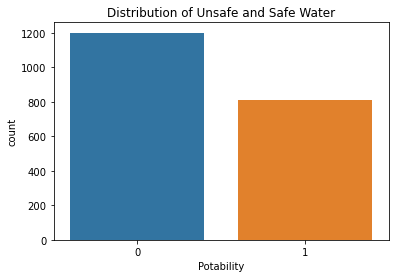

In [81]:
sns.countplot(data.Potability)
plt.title("Distribution of Unsafe and Safe Water")
plt.show()

In [82]:
import plotly.express as px
data = data
figure = px.histogram(data, x = "ph", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: PH")
figure.show()

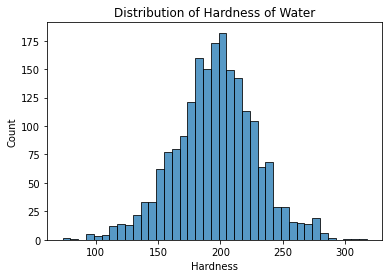

In [85]:
sns.histplot(data.Hardness)
px.histogram(data.Hardness)
plt.title("Distribution of Hardness of Water")
plt.show()

In [86]:
data.head(2)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [87]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [25]:
hardwtr=data[data['Hardness']>100]

In [32]:
print('Percent of hard water in sample :',((len(hardwtr)/len(df['Hardness']))**100))

Percent of hard water in sample : 4.0927762769197737e-22


In [88]:
data.shape

(2011, 10)

In [89]:
correlation = data.corr()
correlation["ph"].sort_values(ascending=False)

ph                 1.000000
Hardness           0.108948
Organic_carbon     0.028375
Trihalomethanes    0.018278
Potability         0.014530
Conductivity       0.014128
Sulfate            0.010524
Chloramines       -0.024768
Turbidity         -0.035849
Solids            -0.087615
Name: ph, dtype: float64

In [90]:
correlation['Hardness'].sort_values(ascending=False)

Hardness           1.000000
ph                 0.108948
Organic_carbon     0.013224
Conductivity       0.011731
Potability        -0.001505
Trihalomethanes   -0.015400
Chloramines       -0.022685
Turbidity         -0.034831
Solids            -0.053269
Sulfate           -0.108521
Name: Hardness, dtype: float64

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier

In [92]:
data.head(2)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [93]:
x=data.drop('Potability',axis=1)
y=data.Potability

In [94]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [95]:
x[0:3]

array([[ 0.7824658 ,  0.56411376,  0.01168692,  0.5838039 ,  0.57437811,
        -0.78396246,  1.22703167,  2.11165179,  0.84476056],
       [ 1.27546291, -0.45565257, -0.45583491, -0.37094728, -0.56048006,
        -0.34842885, -0.84215371, -2.14039865,  0.13503344],
       [-0.95483488, -0.23461412,  0.7906452 ,  0.25910357, -0.15891057,
        -1.81006276, -1.79234008, -0.7144228 , -1.80736621]])

In [96]:
y[0:3]

3    0
4    0
5    0
Name: Potability, dtype: int64

In [97]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)

In [117]:
adb=AdaBoostClassifier(base_estimator=None,n_estimators=500,learning_rate=1.0,algorithm='SAMME.R',
    random_state=None,)

In [118]:
adb.fit(xtrain,ytrain)

AdaBoostClassifier(n_estimators=500)

In [119]:
adb.score(xtrain,ytrain)

0.8057029177718833

In [120]:
adb.score(xtest,ytest)

0.5666003976143141

In [121]:
ypred1=adb.predict(xtest)

In [123]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypred1)

0.5666003976143141

In [124]:
# randrom forest classifier
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(    n_estimators=100,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto')

In [125]:
rfc.fit(xtrain,ytrain)

RandomForestClassifier()

In [126]:
rfc.score(xtest,ytest)

0.6759443339960238

In [127]:
rfc.score(xtrain,ytrain)

1.0

In [57]:
# Logistic regression model
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [58]:
lr.fit(xtrain,ytrain)

LogisticRegression()

In [60]:
lr.score(xtrain,ytrain)

0.5908488063660478

In [59]:
lr.score(xtest,ytest)

0.6083499005964215

In [61]:
### Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [62]:
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [66]:
ypred3=dtc.predict(xtest)

In [63]:
dtc.score(xtrain,ytrain)

1.0

In [64]:
dtc.score(xtest,ytest)

0.614314115308151

In [65]:
from sklearn.metrics import classification_report

In [68]:
print(classification_report(ypred3,ytest))

              precision    recall  f1-score   support

           0       0.68      0.69      0.68       305
           1       0.51      0.50      0.51       198

    accuracy                           0.61       503
   macro avg       0.59      0.59      0.59       503
weighted avg       0.61      0.61      0.61       503

